# Coursera Dataset Analysis

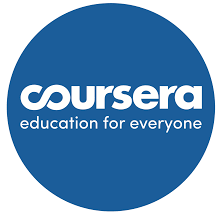

#  Introduction
Tilto, Inc. is a Lithuanian education and technology company, registered in the United States. Tilto is planning to create a company with Coursera as a model. Coursera was founded by Daphne Koller and Andrew Ng in 2012 with a vision of providing life-transforming learning experiences to learners around the world. Today, Coursera is a global online learning platform that offers anyone, anywhere, access to online courses and degrees from leading universities and companies.

In Lithuanian, Tilto means bridge. Tilto, Inc. plans to become an international company that impacts the world by making its citizens realize their innate potentials. Tilto's leadership wants to understand what makes Coursera successful. They also want to know what can be done better, so Tilto can become an even stronger organization than Coursera. This analysis will help Tilto achieve its vision. For this analysis, I will work with a dataset provided by Coursera and obtained from Kaggle.

# Goals

The goal of this project is to analyze Coursera's content offering and advise Tilto's leadership on how to move forward with their vision. This analysis will include:



**Total Numbers**

1. How many students have enrolled at Coursera?

2. How many courses are offered at Coursera?

3. How many organizations offer courses at Coursera?



**Organizations**

1. Which ten organizations have the highest enrollment?

2. Which ten organizations have the lowest enrollment?

3. Which ten organizations offer the highest number of courses?

4. Which organizations offer fewer than 10 courses? 



**Courses**

1. What are the top ten course titles with the highest enrollment?

2. What are the bottom ten-course titles with the lowest enrollment?



**Difficulty Levels**

1. What are the difficulty levels of courses at Coursera?

2. What is the enrollment numbers in courses at each difficulty level?



**Certificates**

1. What types of certificates can students earn at Coursera?

2. What is the total number of each type of certificate offered?



**Ratings**

1. What are the top ten highest-rated courses at Coursera?

2. What are the bottom ten lowest-rated courses?

3. What are the top ten highest-rated educational organizations? 

4. What are the bottom ten lowest-rated organizations?



**Correlations**

1. How do student ratings correlate with course enrollment numbers? 



**Conclusions**

1. What are the main ideas gleaned from this analysis?



**Recommendations**

1. What can Tilto, Inc. learn from Coursera? 

2. How can Tilto become a better organization than Coursera?

# Technical Requirements

* Download the data from Coursera Course Dataset.
* Load the data using Pandas.
* Perform data cleaning.
* Perform exploratory data analysis.
* Provide clear explanations in your notebook. 
* Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
* Provide suggestions about how your analysis can be improved.

# Importing Libraries and Loading Data

## Importing Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_palette("pastel")

## Loading Data in Pandas

In [2]:
coursera = pd.read_csv(
    "C:\py\Projects\TuringCollege\Coursera\DataSet\coursera.csv",
    index_col=0,
    skipinitialspace=True,
)

## Section Summary
> * The data is a CSV file that I have downloaded from Kaggle.
> * I created a Pandas dataframe object to work with the data.
> * The CSV file contains spaces following the comma. I set skipinitialspace=True to ignore these spaces. 
> * I imported warnings library to supress unneeded FutureWarnings that can appear with certain code executions.
> * I used the Seaborn Library's Pastel Pallete for the entire project.

# Basic Information

In this section, I will display the following information about this dataset:

1. Number of rows and columns
2. Total number of data entries
3. The first 10 rows
4. The data types in this dataset

## Number of Rows and Columns 

In [3]:
coursera.shape

(891, 6)

## Number of Entries

In [4]:
coursera.size

5346

## The First Ten Rows

In [5]:
pd.set_option("display.max.columns", None)
coursera.sort_index(inplace=True)
coursera.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
7,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510k
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220k
9,Cloud Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.7,Intermediate,310k


## Data Types

In [6]:
coursera.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

## Section Summary
> * This dataset is made of 891 rows and 6 columns.
> * This dataset is made of 5346 data entries.
> * All data types of this dataset are of type object except course_rating, which is of type float64.

# Data Cleaning

## Missing Values

In [7]:
coursera.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

## Duplicate Values

In [8]:
coursera[coursera.duplicated(keep=False)].sum()

course_title                0.0
course_organization         0.0
course_Certificate_type     0.0
course_rating               0.0
course_difficulty           0.0
course_students_enrolled    0.0
dtype: float64

## Duplicate Values in the Course Title Column

In [9]:
coursera[coursera["course_title"].duplicated(keep=False)].shape[0]

6

In [10]:
coursera[coursera["course_title"].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k


## Duplicate Values in the Course Organization Column

In [11]:
coursera[coursera["course_organization"].duplicated(keep=False)].shape[0]

842

In [12]:
coursera[coursera["course_organization"].duplicated(keep=False)].sort_values(
    "course_organization"
).head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1.7k
612,Access Controls,(ISC)²,COURSE,4.6,Beginner,2.9k
828,AWS Fundamentals: Migrating to the Cloud,Amazon Web Services,COURSE,4.5,Intermediate,13k
631,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,COURSE,4.3,Beginner,11k
43,AWS Fundamentals,Amazon Web Services,SPECIALIZATION,4.6,Beginner,130k
861,AWS Fundamentals: Building Serverless Applicat...,Amazon Web Services,COURSE,4.7,Beginner,27k
281,AWS Fundamentals: Going Cloud-Native,Amazon Web Services,COURSE,4.7,Beginner,110k
568,Getting Started with AWS Machine Learning,Amazon Web Services,COURSE,4.5,Intermediate,73k
690,The Science of Stem Cells,American Museum of Natural History,COURSE,4.7,Intermediate,12k


## Modification of Column Names

In [13]:
coursera.rename(
    columns={
        "course_title": "Course",
        "course_organization": "Organization",
        "course_Certificate_type": "Certificate",
        "course_rating": "Rating",
        "course_difficulty": "Difficulty",
        "course_students_enrolled": "Students",
    },
    inplace=True,
)

In [14]:
coursera.head(10)

,Course,Organization,Certificate,Rating,Difficulty,Students
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
7,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510k
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220k
9,Cloud Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.7,Intermediate,310k


## Modification of Certificate Column

In [15]:
# Makes each string into title case.
coursera["Certificate"] = coursera["Certificate"].str.title()

# Removes text 'Certificate' from any value in this column.
coursera["Certificate"] = coursera["Certificate"].str.replace(r"Certificate", "")

# Removes ALL white spaces from values of this column.
coursera["Certificate"].str.strip()

coursera.head(10)

,Course,Organization,Certificate,Rating,Difficulty,Students
0,IBM Data Science,IBM,Professional,4.6,Beginner,480k
1,Introduction to Data Science,IBM,Specialization,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1.5m
4,Google IT Support,Google,Professional,4.8,Beginner,350k
5,Deep Learning,deeplearning.ai,Specialization,4.8,Intermediate,690k
6,Machine Learning,Stanford University,Course,4.9,Mixed,3.2m
7,Business Foundations,University of Pennsylvania,Specialization,4.7,Beginner,510k
8,Applied Data Science,IBM,Specialization,4.6,Beginner,220k
9,Cloud Engineering with Google Cloud,Google Cloud,Professional,4.7,Intermediate,310k


## Modification of Student Enrollment Column

In [16]:
coursera["Symbol"] = coursera["Students"].str[-1:]
coursera.Symbol.unique()

array(['k', 'm'], dtype=object)

In [17]:
pd.set_option("max_rows", None)
coursera["Students"] = coursera["Students"].str.extract(r"(\d+[.\d]*)").astype(float)

In [18]:
# 'k' symbol multiply by 1000.
# 'm' symbol multiply by 1000.1,000,000.
coursera.loc[coursera["Symbol"] == "k", "Multiple"] = 1000
coursera.loc[coursera["Symbol"] == "m", "Multiple"] = 1000000
coursera["Multiple"] = coursera["Multiple"].astype(int)

In [19]:
coursera["Enrollment"] = coursera["Students"] * coursera["Multiple"]
coursera["Enrollment"] = coursera["Enrollment"].astype(int)

In [20]:
# Deletes the unnecssary columns.
coursera = coursera.drop(["Symbol", "Multiple", "Students"], axis=1)

In [21]:
coursera.head(10)

,Course,Organization,Certificate,Rating,Difficulty,Enrollment
0,IBM Data Science,IBM,Professional,4.6,Beginner,480000
1,Introduction to Data Science,IBM,Specialization,4.6,Beginner,310000
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000
4,Google IT Support,Google,Professional,4.8,Beginner,350000
5,Deep Learning,deeplearning.ai,Specialization,4.8,Intermediate,690000
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000
7,Business Foundations,University of Pennsylvania,Specialization,4.7,Beginner,510000
8,Applied Data Science,IBM,Specialization,4.6,Beginner,220000
9,Cloud Engineering with Google Cloud,Google Cloud,Professional,4.7,Intermediate,310000


## Modification of Column Order

In [22]:
coursera = coursera[
    ["Organization", "Course", "Difficulty", "Certificate", "Enrollment", "Rating"]
]
coursera.head(10)

,Organization,Course,Difficulty,Certificate,Enrollment,Rating
0,IBM,IBM Data Science,Beginner,Professional,480000,4.6
1,IBM,Introduction to Data Science,Beginner,Specialization,310000,4.6
2,Yale University,The Science of Well-Being,Mixed,Course,2500000,4.9
3,University of Michigan,Python for Everybody,Beginner,Specialization,1500000,4.8
4,Google,Google IT Support,Beginner,Professional,350000,4.8
5,deeplearning.ai,Deep Learning,Intermediate,Specialization,690000,4.8
6,Stanford University,Machine Learning,Mixed,Course,3200000,4.9
7,University of Pennsylvania,Business Foundations,Beginner,Specialization,510000,4.7
8,IBM,Applied Data Science,Beginner,Specialization,220000,4.6
9,Google Cloud,Cloud Engineering with Google Cloud,Intermediate,Professional,310000,4.7


## Section Summary
> * This dataset has no missing values.
> * There are 6 duplicates in the Course Title column. Three courses have one duplicate each. Each of the duplicate course titles has a different type of certificate and/or difficulty level.
> * In the Organizations column, there are 842 values that have duplicates. This is expected as several organizations offer multiple courses.
> * I made the following modifictions to this dataset:
    1. I modified the name of each column to make them clearer and more attractive.
    2. I modified the Certificate column so the text is in the title case. I also removed the unnecessary text,        'Certificate' from some of the entries. 
    3. I modified the Enrolled column so it's values are in integer format.
    4. I modified the order of the columns to make the dataset easier to work with and more understandable.

# Descriptive Statistics

In this section, I provide basic statistical details and summarize the data on the 2 numerical features of this dataset, 'Enrollment' and 'Rating'. I also provide basic statistical detail on the categorical columns.

In [23]:
coursera.describe().applymap("{:,.2f}".format)

,Enrollment,Rating
count,891.00,891.00
mean,"90,552.08",4.68
std,"181,936.45",0.16
min,"1,500.00",3.30
25%,"17,500.00",4.60
50%,"42,000.00",4.70
75%,"99,500.00",4.80
max,"3,200,000.00",5.00


In [24]:
coursera.describe(include="object")

,Organization,Course,Difficulty,Certificate
count,891,891,891,891
unique,154,888,4,3
top,University of Pennsylvania,Machine Learning,Beginner,Course
freq,59,2,487,582


## Section Summary

**Quantitative Data**

> * There are 891-course titles in total.
> * The mean rating is 4.68, with a very small (0.16) standard deviation. This means most of the students are satisfied with their experience at Coursera. Only 25% of the ratings are below 4.60.
> * The mean enrollment in a course is over 90,000 with a large standard deviation (182,000). This means that there is a wide variety of numbers of students enrolled in each course, with a maximum number at 3,000,000 and a minimum number at 1500.

**Categorical Data**

> * count: Total number of items
> * unique: Number of unique items
> * top: The most common value
> * freq: The most common value’s frequency
> * Only 154 organizations created the 891 courses at Coursera.
> * Coursera's courses are organized into 4 difficulty levels and 3 types of certificates are offered.
> * Of the 891 course titles, 487 or approximately half are Beginner level courses.
> * Of the 891 course title, 582 or more than 65% are listed as "Course" certificates which means no certificate is given.

# Outliers

An outlier is an observation that is unlike the other observations.

I used the **Interquartile Range (IQR)** method to identify outliers. The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. The whiskers indicate the minimum and the maximum values. Any values that is 1.5 times the IQR value above Q3 and 1.5 times the IQR value below Q1 will be considered an outlier. These are indicated as dots in a box and whisker plot.

In [25]:
# Ignores FutureWarning message that appears with the code below.
warnings.simplefilter(action="ignore", category=FutureWarning)

In [26]:
Q1 = coursera.quantile(0.25)
Q3 = coursera.quantile(0.75)
IQR = Q3 - Q1

outliers_df = (coursera < (Q1 - 1.5 * IQR)) | (coursera > (Q3 + 1.5 * IQR))

((coursera < (Q1 - 1.5 * IQR)) | (coursera > (Q3 + 1.5 * IQR))).sum()

Certificate      0
Course           0
Difficulty       0
Enrollment      78
Organization     0
Rating          17
dtype: int64

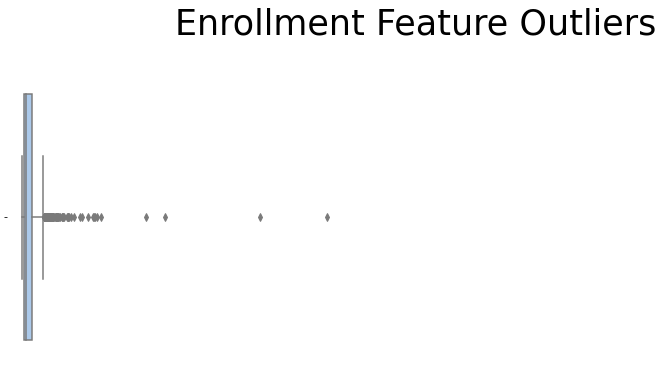

In [32]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=coursera, x=coursera["Enrollment"])

plt.tight_layout()
plt.title(
    "Enrollment Feature Outliers", fontsize=35, pad=30, horizontalalignment="left")
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

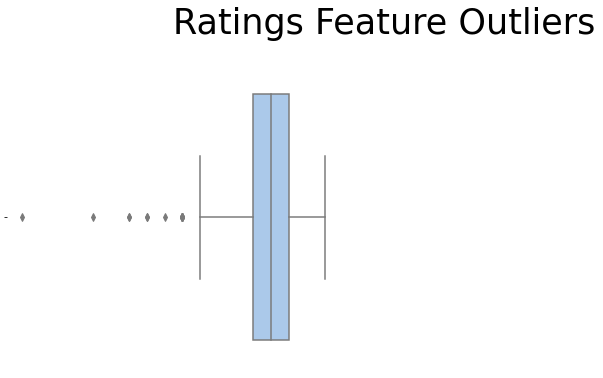

In [33]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=coursera, x=coursera["Rating"], palette="pastel")

plt.tight_layout()
plt.title("Ratings Feature Outliers", fontsize=35, pad=30, horizontalalignment="left")
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

## Summary of Findings

> * Outliers can capture valuable information and excluding them has to be done with caution. 
> * There are three causes for outliers:
    1. Data entry and measurement errors
    2. Sampling problems
    3. Natural variations
> * According to the statistical methodology that I used, there are outliers in the following features:
    - Enrollment: 78
    - Rating: 17
> * In my opinion, the outliers in this dataset fit the third cause, natural variations. 
> * Even though there are values that do not fit with the pattern of the rest of the data, in my opinion, the extreme values are legitimate. 
> * I left the outlier data in the dataset. 

# Exploratory Data Analysis (EDA)

## Total Numbers

### Total Enrollment

In [34]:
total_enrollment = coursera["Enrollment"].sum()
total_enrollment

80681900

### Total Number of Unique Course Titles

In [35]:
total_courses = coursera["Course"].nunique()
total_courses

888

### Total Number of Organizations

In [36]:
total_organizations = coursera["Organization"].nunique()
total_organizations

154

### Summary of Findings
> * There are over 80 million students that have taken courses at Coursera.
> * Coursera provides nearly 1000 different courses.
> * The nearly 1000 courses are created by about 150 organizations.

## Organizations

In this section, I will answer the following questions:

1. Which ten organizations have the highest enrollment?
2. Which ten organizations have the lowest enrollment?
3. Which ten organizations offer the highest number of courses?
4. Which organizations offer fewer than 10 courses? 

### Top Ten Organizations with the Highest Enrollment

In [37]:
highest_enrollment = coursera.pivot_table(
    "Enrollment",
    index="Organization",
    aggfunc="sum",
    margins=True,
    margins_name="Total Enrollment",
)
highest_enrollment = highest_enrollment.sort_values("Enrollment", ascending=False).head(
    11
)
highest_enrollment = highest_enrollment.drop("Total Enrollment", axis=0)
highest_enrollment["Percentage"] = (
    highest_enrollment["Enrollment"] / total_enrollment
) * 100
highest_enrollment = highest_enrollment.reset_index()

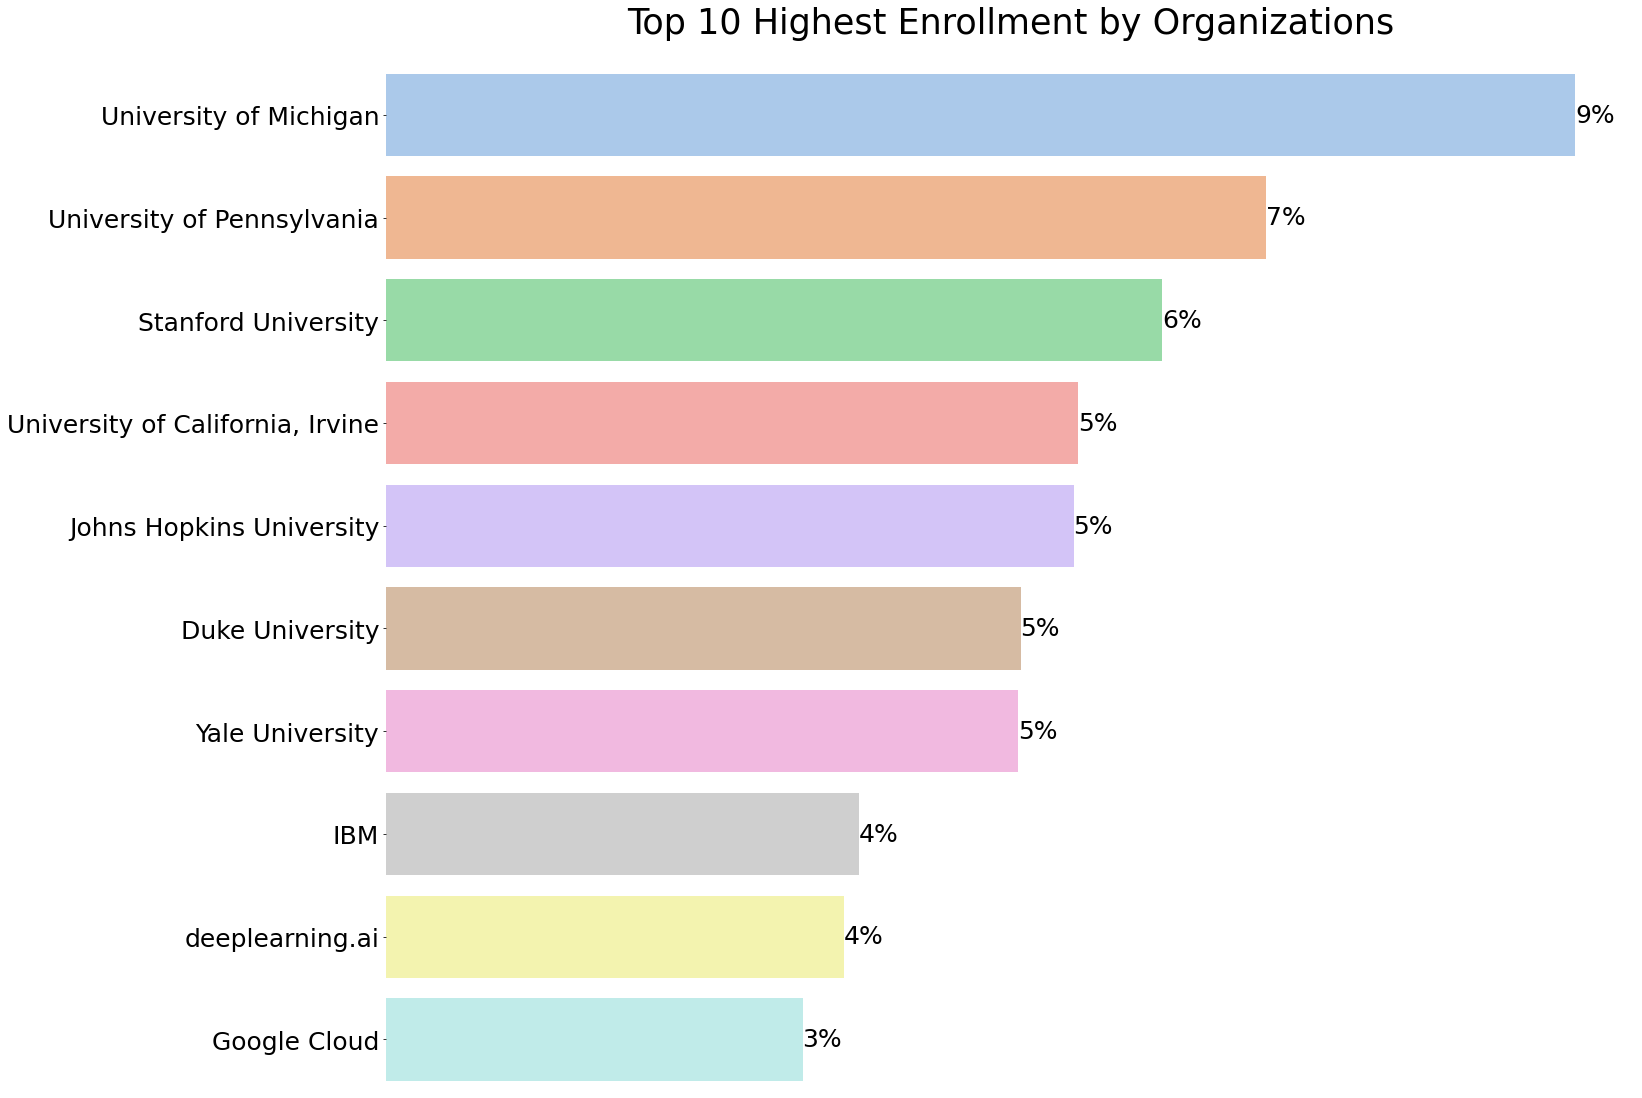

In [33]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(x="Percentage", y="Organization", data=highest_enrollment, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.0f%%")

plt.tight_layout()
plt.title("Top 10 Highest Enrollment by Organizations", fontsize=35, pad=30)

plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)

plt.ylabel("")
plt.xlabel("")

sns.despine(bottom=True, left=True)

### Bottom Ten Organizations with the Lowest Enrollment

In [38]:
lowest_enrollment = coursera.pivot_table(
    "Enrollment",
    index="Organization",
    aggfunc="sum",
    margins=True,
    margins_name="Total Enrollment",
)
lowest_enrollment = lowest_enrollment.sort_values("Enrollment", ascending=False).tail(
    10
)
lowest_enrollment["Percentage"] = (
    lowest_enrollment["Enrollment"] / total_enrollment
) * 100
lowest_enrollment = lowest_enrollment.reset_index()

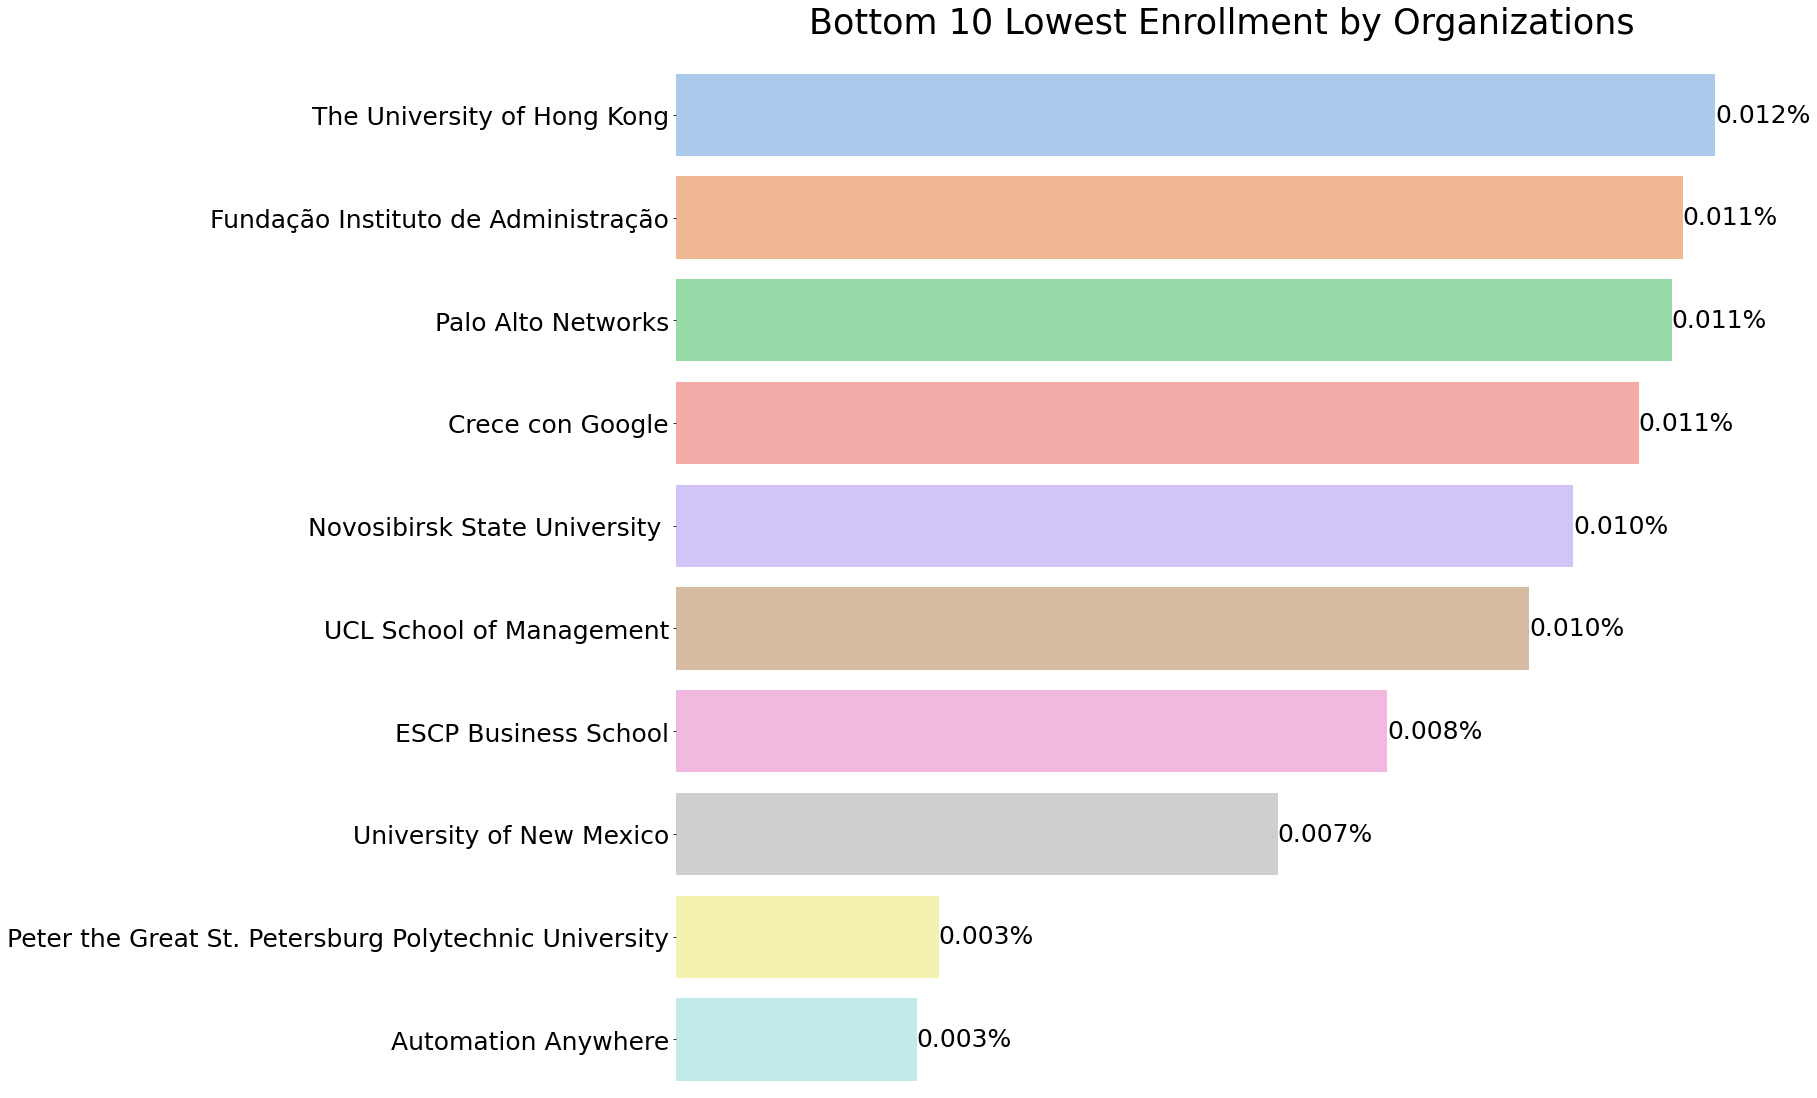

In [39]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(x="Percentage", y="Organization", data=lowest_enrollment, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.3f%%")


plt.tight_layout()
plt.title("Bottom 10 Lowest Enrollment by Organizations", fontsize=35, pad=30)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Top Ten Organizations with the Highest Number of Course Offerings

In [40]:
highest_course_numbers = coursera.pivot_table(
    "Course", index="Organization", aggfunc="count", dropna=True
)

highest_course_numbers = highest_course_numbers.sort_values(
    "Course", ascending=False
).head(11)
highest_course_numbers["Percentage"] = (
    highest_course_numbers["Course"] / total_courses
) * 100
highest_course_numbers = highest_course_numbers.reset_index()

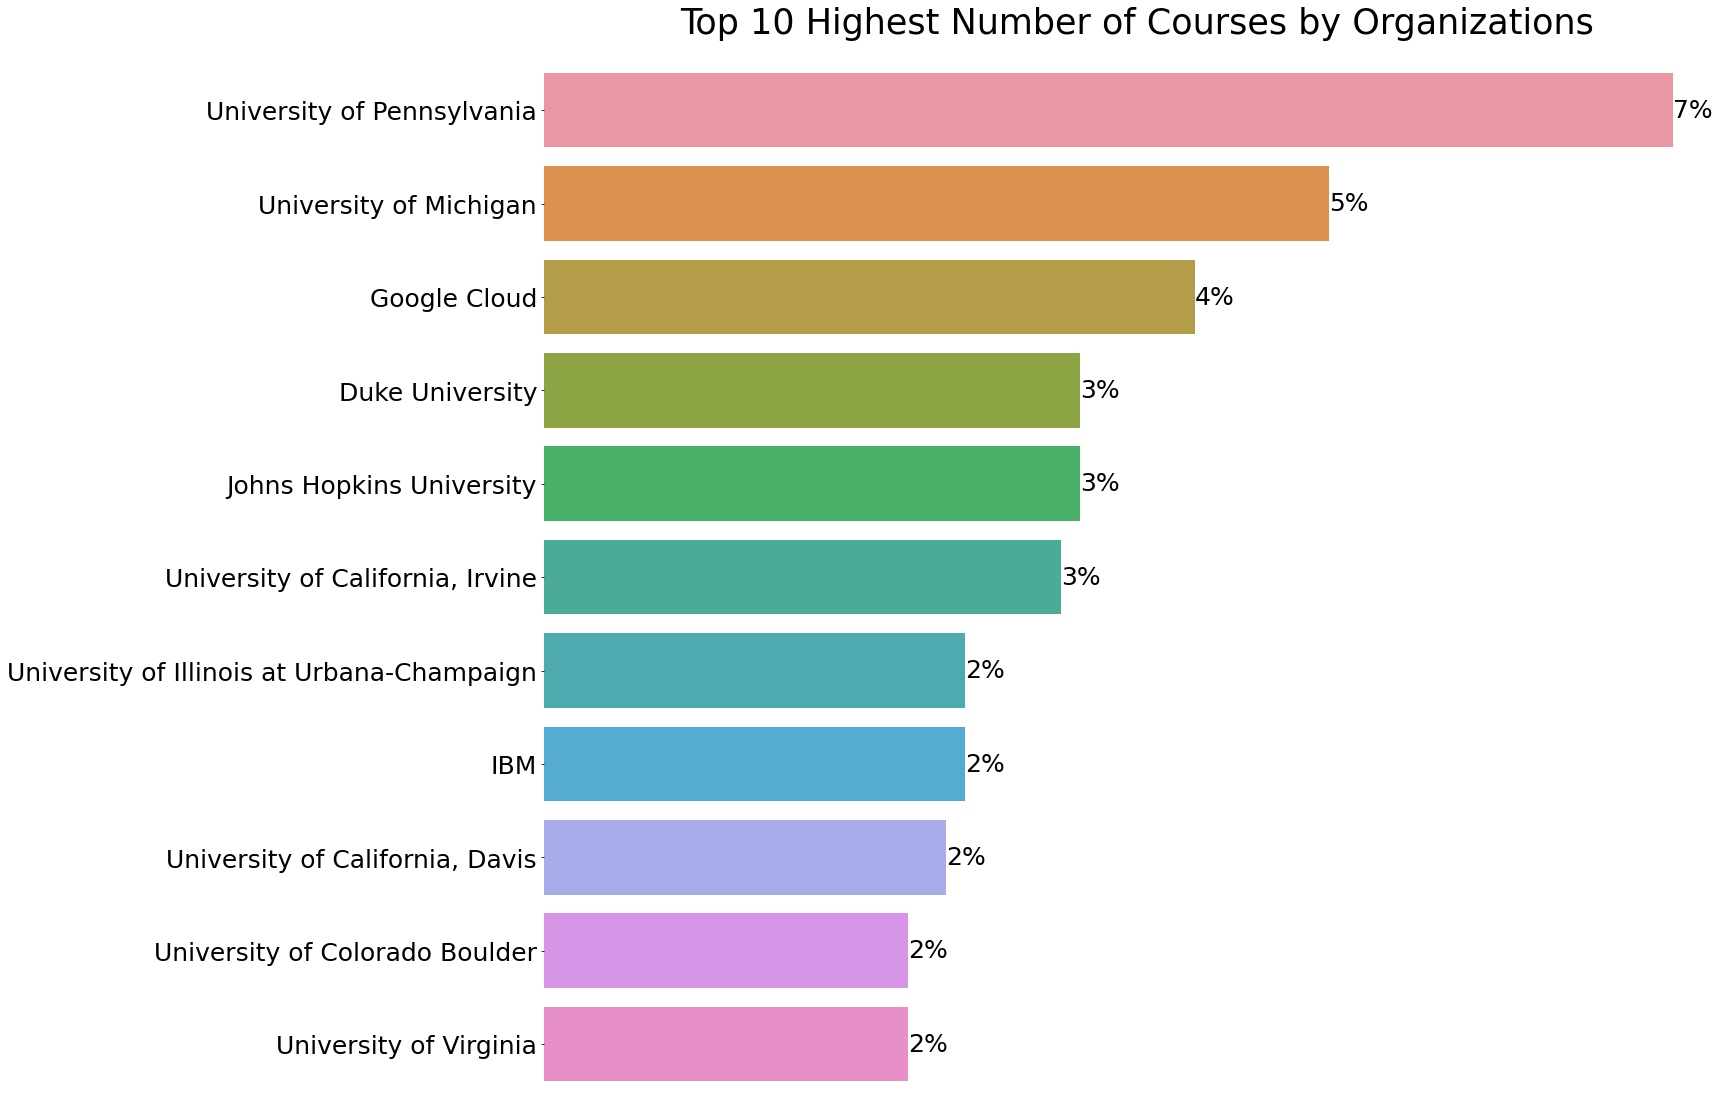

In [41]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(
    x="Percentage",
    y="Organization",
    data=highest_course_numbers,
    ci=None,
)

ax.bar_label(ax.containers[0], size=25, fmt="%.0f%%")


plt.tight_layout()
plt.title("Top 10 Highest Number of Courses by Organizations", fontsize=35, pad=30)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Number of Organizations with Fewer than 10 Course Offering

In [38]:
lowest_course_numbers = coursera.pivot_table(
    "Course", index="Organization", aggfunc="count", dropna=True
)

lowest_course_numbers = lowest_course_numbers.query("Course < 10")
lowest_course_numbers.shape[0]

130

### Section Summary

> * Over 50% of enrollment is in courses from the top 10 organizations.
> * Fewer than 1% of enrollment is in courses from the bottom 10 organizations.
> * Over 80% of organizations offer fewer than 10 courses.
> * This data makes obvious how some organizations are more prolific course creators.

## Courses

In this section, I will answer the following questions:

1. What are the ten-course titles with the highest enrollment?
2. What are the ten-course titles with the lowest enrollment? 

### Top Ten Courses with the Highest Enrollment

In [42]:
highest_enrollment_by_course = coursera.pivot_table(
    "Enrollment", index="Course", aggfunc="sum"
)
highest_enrollment_by_course = highest_enrollment_by_course.sort_values(
    "Enrollment", ascending=False
).head(10)
highest_enrollment_by_course["Percentage"] = (
    highest_enrollment_by_course["Enrollment"] / total_enrollment
) * 100
highest_enrollment_by_course = highest_enrollment_by_course.reset_index()

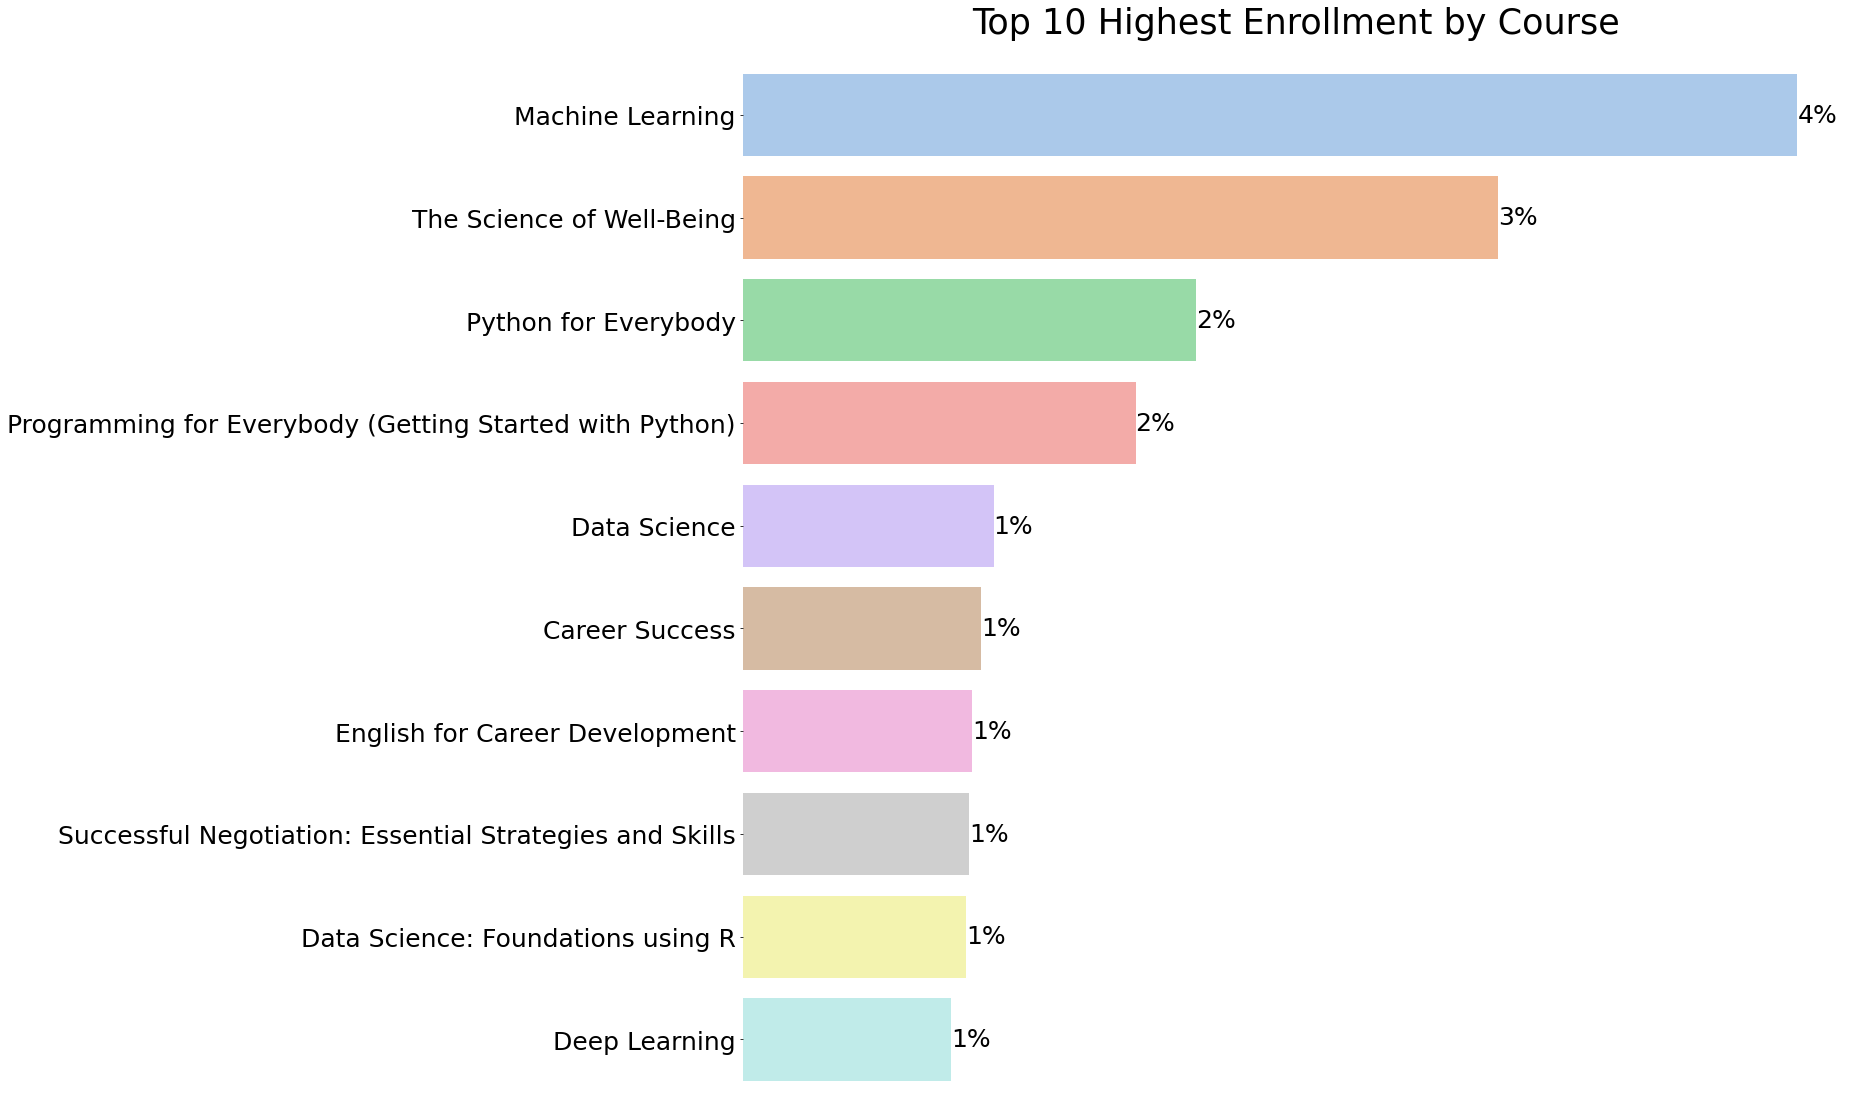

In [43]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(
    x="Percentage",
    y="Course",
    data=highest_enrollment_by_course,
    ci=None,
)

ax.bar_label(ax.containers[0], size=25, fmt="%.0f%%")


plt.tight_layout()
plt.title("Top 10 Highest Enrollment by Course", fontsize=35, pad=30)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Bottom Ten Courses with the Lowest Enrollment

In [44]:
lowest_enrollment_by_course = coursera.pivot_table(
    "Enrollment", index="Course", aggfunc="sum"
)
lowest_enrollment_by_course = lowest_enrollment_by_course.sort_values(
    "Enrollment", ascending=False
).tail(10)
lowest_enrollment_by_course = lowest_enrollment_by_course.reset_index()
lowest_enrollment_by_course["Percentage"] = (
    lowest_enrollment_by_course["Enrollment"] / total_enrollment
) * 100

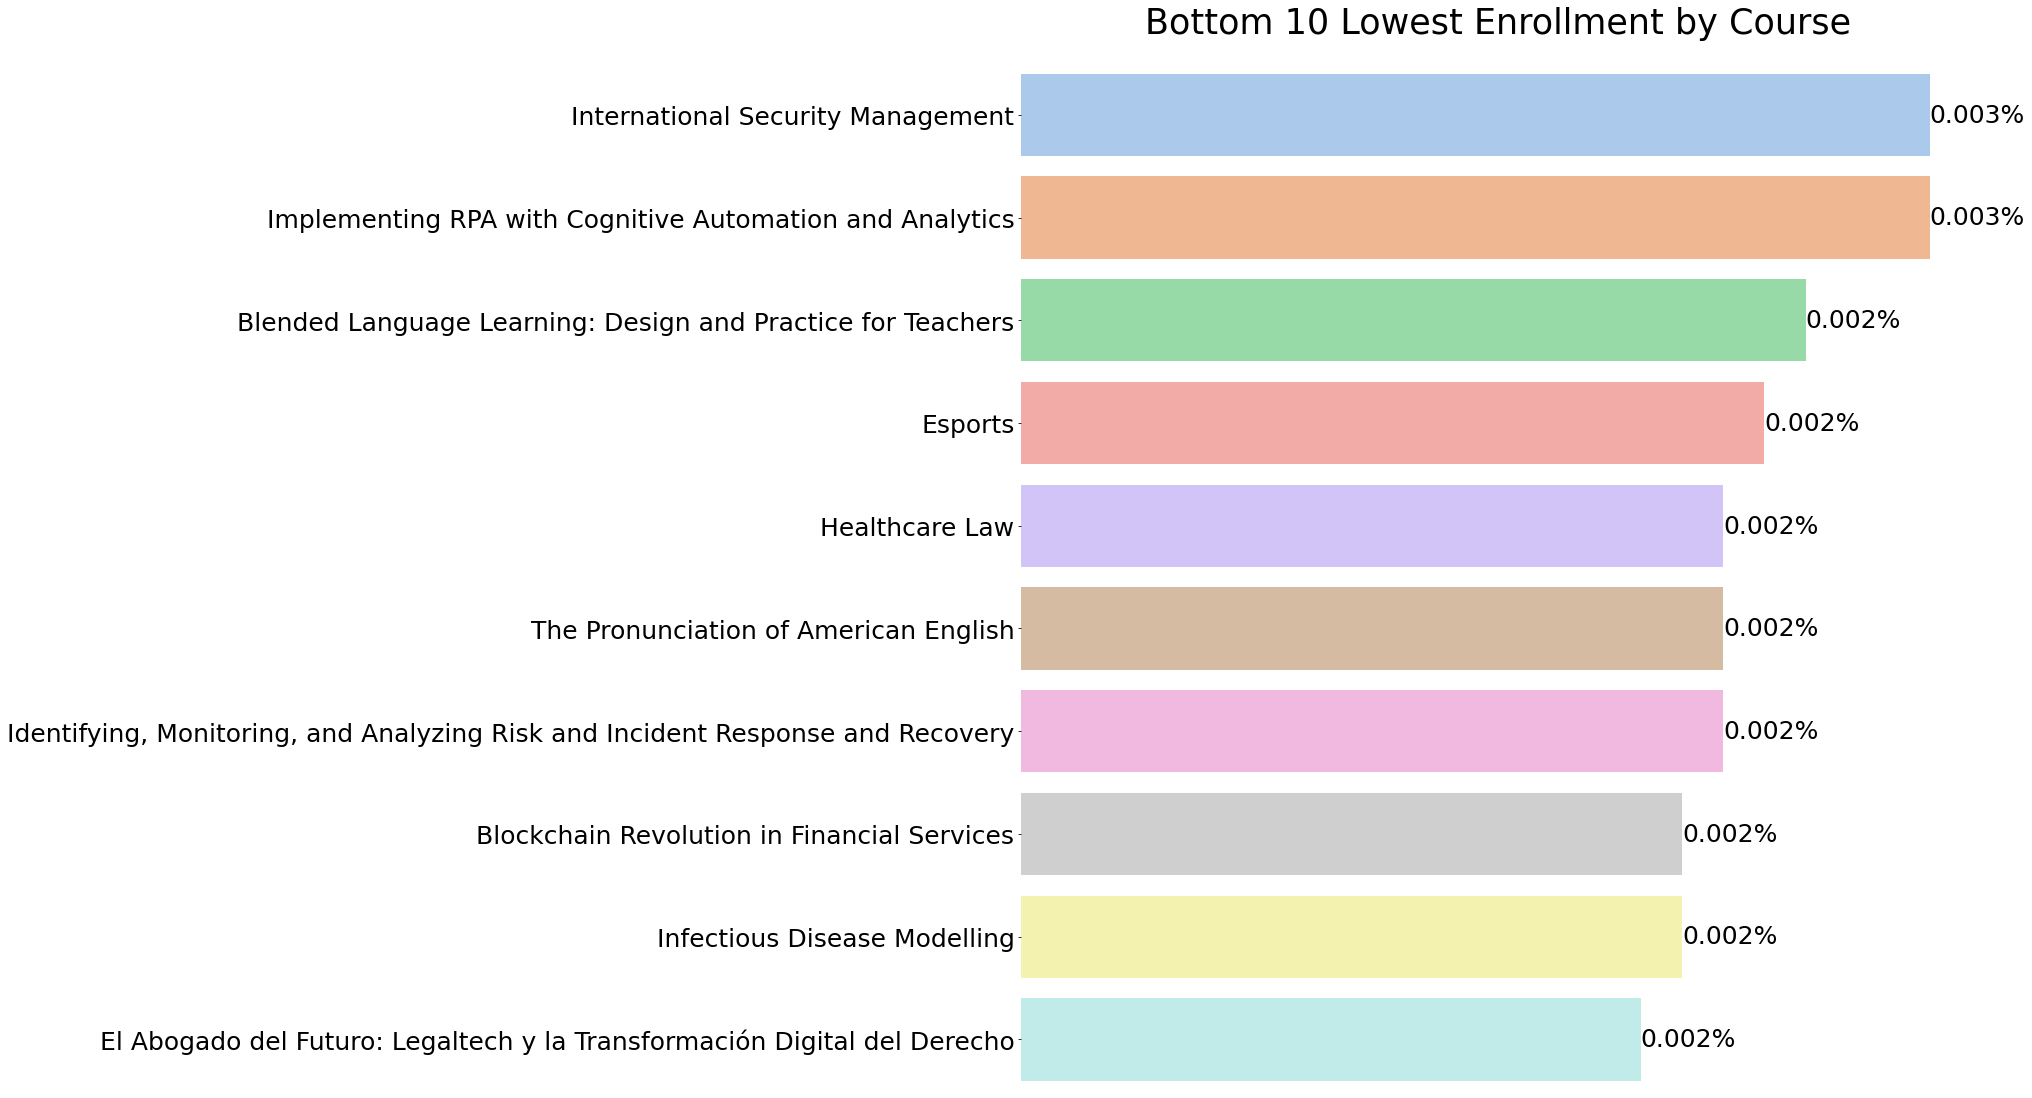

In [45]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(
    x="Percentage",
    y="Course",
    data=lowest_enrollment_by_course,
    ci=None,
)

ax.bar_label(ax.containers[0], size=25, fmt="%.3f%%")


plt.tight_layout()
plt.title("Bottom 10 Lowest Enrollment by Course", fontsize=35, pad=30)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Section Summary

> * The majority of courses with the highest enrollment are in the technology sector.
> * The majority of courses with the lowest enrollment are in the non-technology sector.
> * Even among course with high enrollement, the percentage of enrollment in each course is still in single digits.

## Difficulty Levels

In this section, I will answer the following questions:

1. What are the different difficulty levels at Coursera?
2. What is the total enrollment in courses with each difficulty level?

### Difficulty Levels of Courses

In [46]:
coursera["Difficulty"].unique().tolist()

['Beginner', 'Mixed', 'Intermediate', 'Advanced']

### Enrollment by Difficulty Level

In [47]:
difficulty = coursera.pivot_table(
    "Enrollment",
    index="Difficulty",
    aggfunc="sum",
    margins=True,
    margins_name="Total Enrollment",
)
difficulty = difficulty.drop("Total Enrollment", axis=0)
difficulty = difficulty.sort_values("Enrollment", ascending=False).head(10)
difficulty = difficulty.reset_index()
difficulty["Percentage"] = (difficulty["Enrollment"] / total_enrollment) * 100

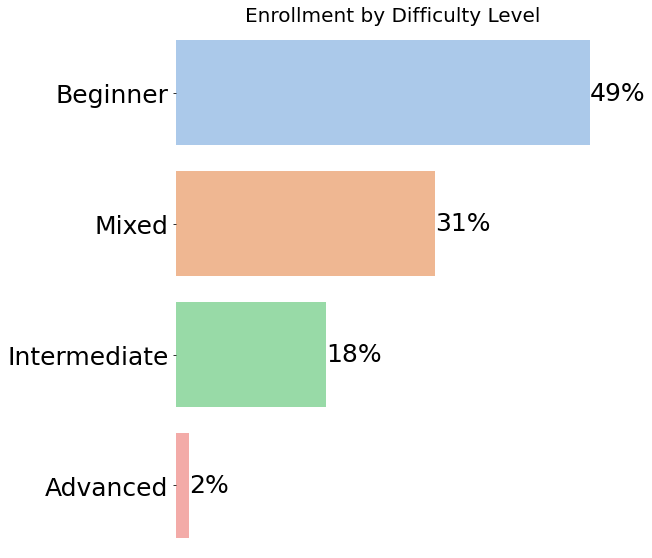

In [48]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(
    x="Percentage",
    y="Difficulty",
    data=difficulty,
    ci=None,
)

ax.bar_label(ax.containers[0], size=25, fmt="%.0f%%")


plt.tight_layout()
plt.title("Enrollment by Difficulty Level", fontsize=20)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Rating by Difficulty Level

In [49]:
difficulty_ratings = coursera.pivot_table("Rating", index="Difficulty", aggfunc="mean")
difficulty_ratings = (
    difficulty_ratings.sort_values("Rating", ascending=False)
    .applymap("{:,.2f}".format)
    .astype(float)
)
difficulty_ratings = difficulty_ratings.reset_index()

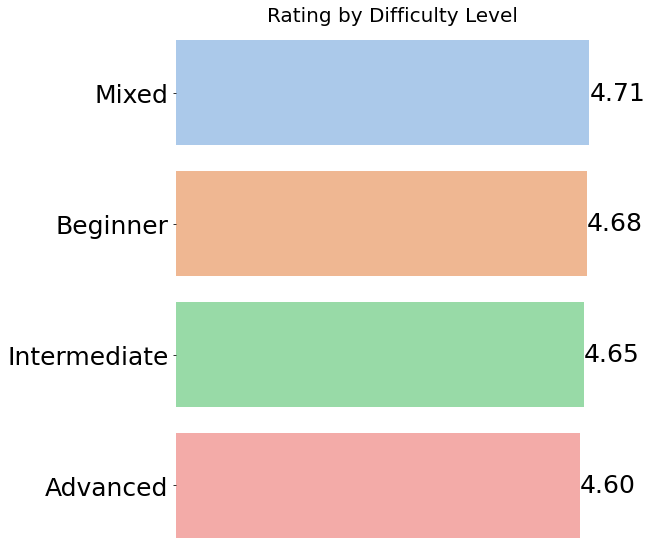

In [50]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(x="Rating", y="Difficulty", data=difficulty_ratings, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.2f")

plt.tight_layout()
plt.title("Rating by Difficulty Level", fontsize=20)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Section Summary
> * Difficulty levels of courses at Coursera
    1. Beginner
    2. Mixed
    3. Intermediate
    4. Advanced
> * Most of the enrollment is in courses at the Beginner difficulty level.
> * The Advanced difficulty level has the fewest enrollment.
> * There is no significant difference between the way students rated Mixed, Beginner, Intermediate or Advanced level courses.

## Certificates

In this section, I will answer the following questions:

1. What types of certificates can students earn at Coursera?
2. What is the total number offered for each type of certificate?
3. Do students rate courses of different types of certificates differently?

### Types of Certificates Offered at Coursera

In [52]:
coursera["Certificate"].unique().tolist()

['Professional ', 'Specialization', 'Course']

### Enrollment by Certificate Type

In [53]:
certificates = coursera.pivot_table(
    "Enrollment",
    index="Certificate",
    aggfunc="sum",
    margins=True,
    margins_name="Total Enrollment",
)
certificates = certificates.drop("Total Enrollment", axis=0)
certificates = certificates.sort_values("Enrollment", ascending=False).head(10)
certificates["Percentage"] = (certificates["Enrollment"] / total_enrollment) * 100
certificates = certificates.reset_index()

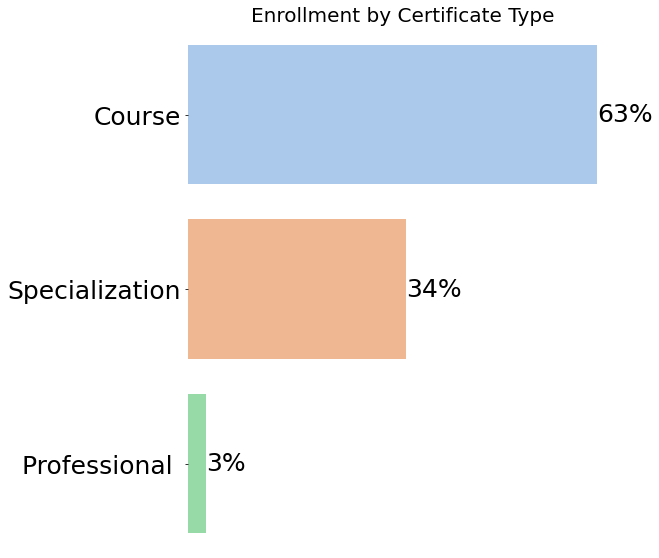

In [50]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(x="Percentage", y="Certificate", data=certificates, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.0f%%")


plt.tight_layout()
plt.title("Enrollment by Certificate Type", fontsize=20)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Rating by Certificate Type

In [51]:
certificate_ratings = coursera.pivot_table(
    "Rating", index="Certificate", aggfunc="mean"
)
certificate_ratings = (
    certificate_ratings.sort_values("Rating", ascending=False)
    .applymap("{:,.2f}".format)
    .astype(float)
)
certificate_ratings = certificate_ratings.reset_index()

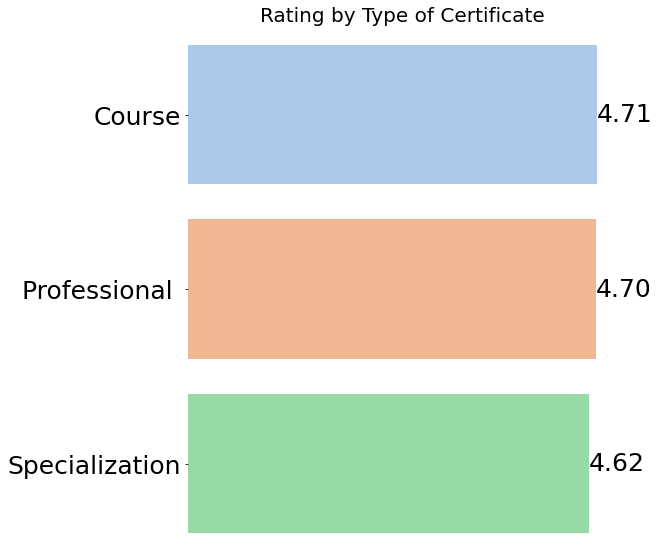

In [52]:
plt.figure(figsize=(8, 8))

ax = sns.barplot(x="Rating", y="Certificate", data=certificate_ratings, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.2f")

plt.tight_layout()
plt.title("Rating by Type of Certificate", fontsize=20)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Section Summary

> * Coursera offers three types of Certificates:
    1. Professional
    2. Specialization
    3. Course
> * Certificate type, "Course" indicates that the course does not offer a certificate. 
> * Most students enroll in courses with no certificate. 
> * By far, the fewest enrollment is in courses that offer a professional certificate.
> * Students rated the courses with different certificate types about the same. 

## Ratings

In this section, I will answer the following questions:

1. What are the top ten highest-rated courses?
2. What are the bottom ten lowest-rated courses?
3. What are the top ten highest-rated organizations? 
4. What are the bottom ten lowest-rated organizations?

### Top 10 Rated Courses at Coursera

In [53]:
top_ratings_courses = coursera.pivot_table("Rating", index="Course")
top_ratings_courses = (
    top_ratings_courses.sort_values("Rating", ascending=False)
    .head(10)
    .applymap("{:,.2f}".format)
)
top_ratings_courses = top_ratings_courses.reset_index()
top_ratings_courses

,Course,Rating
0,Infectious Disease Modelling,5.00
1,El Abogado del Futuro: Legaltech y la Transfor...,5.00
2,Stories of Infection,4.90
3,Boosting Creativity for Innovation,4.90
4,"Brand Management: Aligning Business, Brand and...",4.90
5,Understanding Einstein: The Special Theory of ...,4.90
6,Bugs 101: Insect-Human Interactions,4.90
7,Build a Modern Computer from First Principles:...,4.90
8,Introduction to Psychology,4.90
9,Everyday Parenting: The ABCs of Child Rearing,4.90


### Bottom 10 Rated Courses at Coursera

In [54]:
bottom_ratings_courses = coursera.pivot_table("Rating", index="Course")
bottom_ratings_courses = (
    bottom_ratings_courses.sort_values("Rating", ascending=False)
    .tail(10)
    .applymap("{:,.2f}".format)
)
bottom_ratings_courses = bottom_ratings_courses.reset_index()
bottom_ratings_courses

,Course,Rating
0,Optical Engineering,4.20
1,Foundations of Marketing Analytics,4.20
2,Instructional Design Foundations and Applications,4.20
3,How to Start Your Own Business,4.10
4,"Introduction to Trading, Machine Learning & GCP",4.00
5,Mathematics for Machine Learning: PCA,4.00
6,iOS App Development with Swift,3.90
7,Machine Learning for Trading,3.90
8,Machine Learning and Reinforcement Learning in...,3.70
9,How To Create a Website in a Weekend! (Project...,3.30


### Top 10 Rated Organizations at Coursera

In [55]:
top_ratings_organizations = coursera.pivot_table("Rating", index="Organization")
top_ratings_organizations = (
    top_ratings_organizations.sort_values("Rating", ascending=False)
    .head(10)
    .applymap("{:,.2f}".format)
)
top_ratings_organizations = top_ratings_organizations.reset_index()
top_ratings_organizations

,Organization,Rating
0,Hebrew University of Jerusalem,4.90
1,"Nanyang Technological University, Singapore",4.90
2,Universidade Estadual de Campinas,4.90
3,Crece con Google,4.90
4,London Business School,4.90
5,Google - Spectrum Sharing,4.90
6,ScrumTrek,4.90
7,Universidade de São Paulo,4.87
8,The University of Chicago,4.85
9,Universidad de los Andes,4.82


### Bottom 10 Rated Organizations at Coursera

In [56]:
bottom_ratings_organizations = coursera.pivot_table("Rating", index="Organization")
bottom_ratings_organizations = (
    bottom_ratings_organizations.sort_values("Rating", ascending=False)
    .tail(10)
    .applymap("{:,.2f}".format)
)
bottom_ratings_organizations = bottom_ratings_organizations.reset_index()
bottom_ratings_organizations

,Organization,Rating
0,Peter the Great St. Petersburg Polytechnic Uni...,4.40
1,American Institute of Business and Economics,4.40
2,Icahn School of Medicine at Mount Sinai,4.40
3,Novosibirsk State University,4.40
4,The Linux Foundation,4.40
5,Luther College at the University of Regina,4.40
6,Unity,4.35
7,New York Institute of Finance,4.30
8,Tsinghua University,4.30
9,The State University of New York,4.27


### Enrollment Number at Specific Ratings

In [57]:
enrollment_ratings = coursera.pivot_table(
    "Enrollment",
    index="Rating",
    aggfunc="sum",
    margins=True,
    margins_name="Total Enrollment",
)
enrollment_ratings = enrollment_ratings.drop("Total Enrollment", axis=0)
enrollment_ratings = enrollment_ratings.sort_values("Enrollment", ascending=False)
enrollment_ratings = enrollment_ratings.reset_index()
enrollment_ratings["Percentage"] = (
    enrollment_ratings["Enrollment"] / total_enrollment
) * 100

enrollment_ratings["Rating"] = enrollment_ratings["Rating"].astype(str)

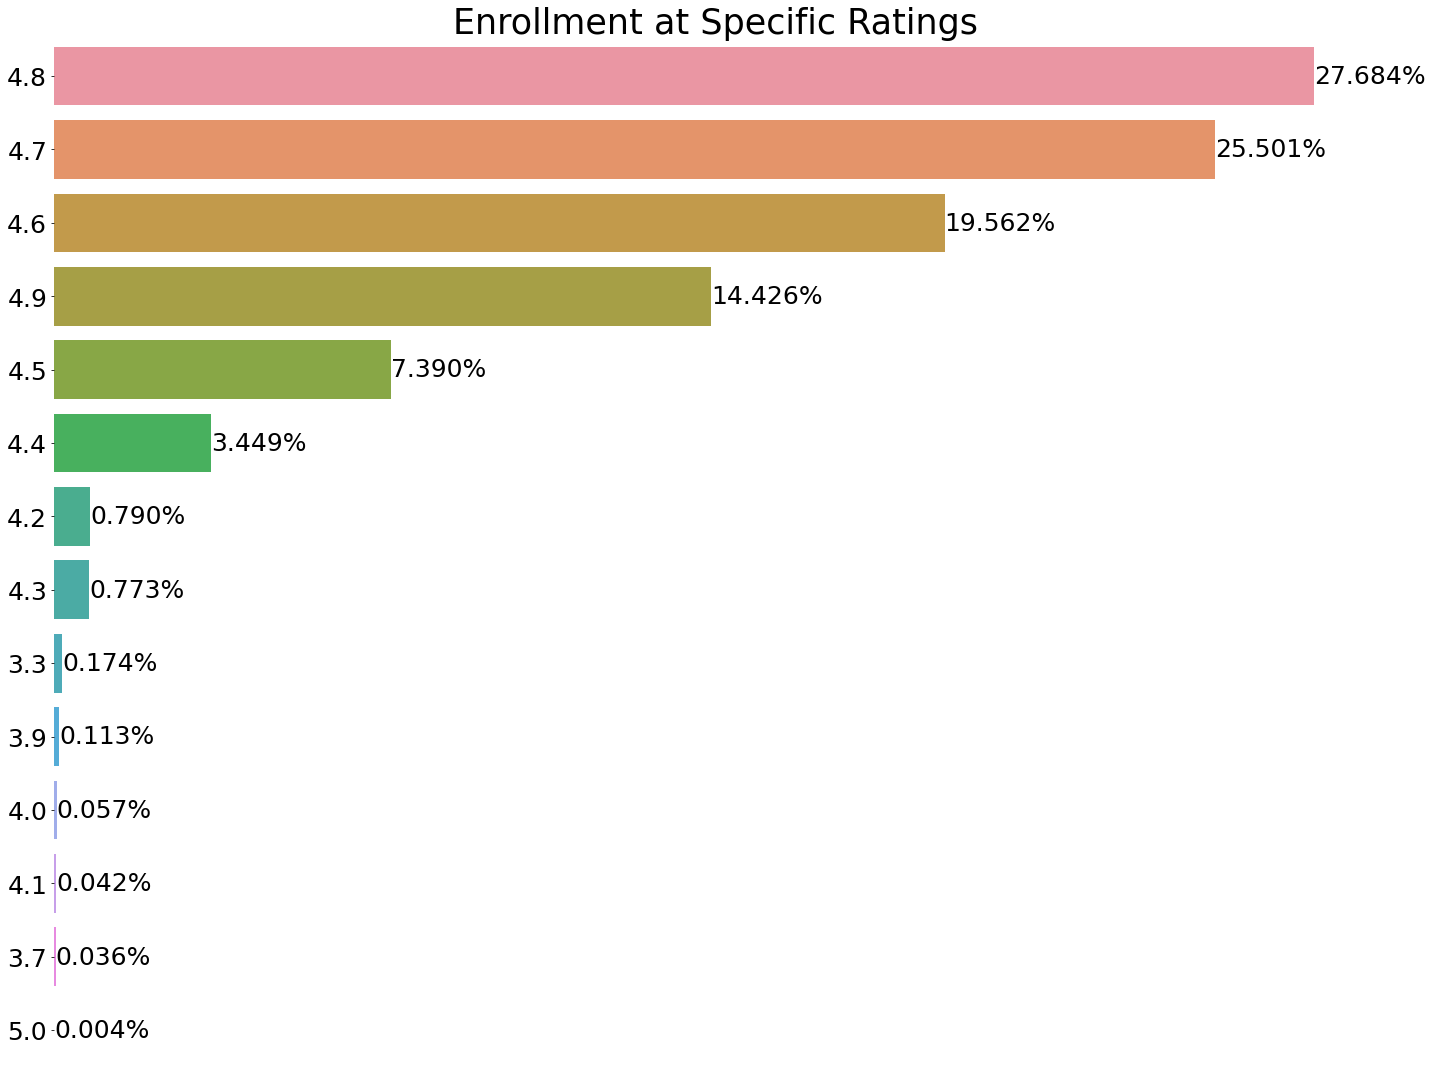

In [58]:
plt.figure(figsize=(20, 15))

ax = sns.barplot(x="Percentage", y="Rating", data=enrollment_ratings, ci=None)

ax.bar_label(ax.containers[0], size=25, fmt="%.3f%%")

plt.tight_layout()
plt.title("Enrollment at Specific Ratings", fontsize=35)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

### Section Summary

> * Most of the highest-rated courses are not in the technology sector.
> * Many of the top-rated organizations are not American.
> * Approximately 96% of the students rated their experience at 4.5 or higher.

# Correlations

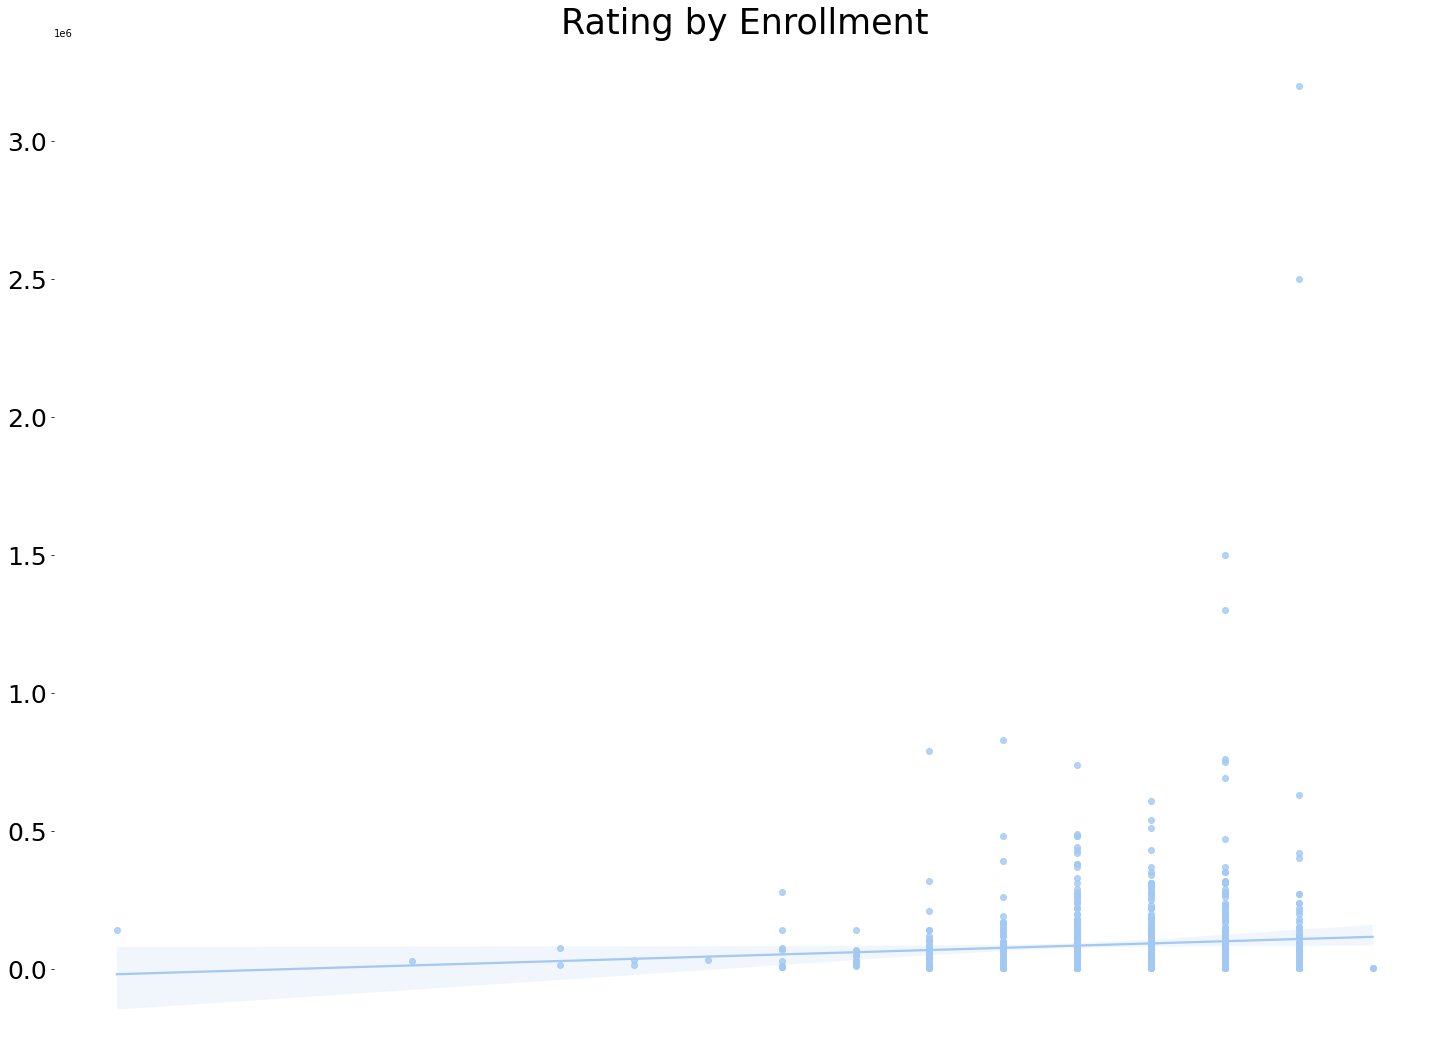

In [59]:
plt.figure(figsize=(20, 15))


ax = sns.regplot(data=coursera, x="Rating", y="Enrollment")

plt.tight_layout()
plt.title("Rating by Enrollment", fontsize=35)
plt.xticks([])
plt.yticks(fontsize=25)
ax.tick_params(bottom=False, left=True)
plt.ylabel("")
plt.xlabel("")
sns.despine(bottom=True, left=True)
plt.show()

## Section Summary
> * There seems to be a very slight correlation between Rating and Enrollment.
> * In my opinion, this correlation is not significant.

# Conclusions

1. Offering **BEGINNER LEVEL** courses will **INCREASE** enrollment.

> * Only about 2% of enrollment is in courses of Advanced difficulty level. <br>
> * Approximately 50% of enrollment is in courses of Beginner difficulty level. <br>
> * Approximately 80% of enrollment is in courses of Beginner or Mixed difficulty level. <br>

2. Offering courses from **SPECIFIC ORGANIZATIONS** will **INCREASE** enrollment.

> * Over 50% of enrollment are in courses from the top 10 organizations. <br>
> * Fewer than 1% of enrollment is in courses from the bottom 10 organizations.<br>

3. There are **SPECIFIC ORGANIZATIONS** that are more **PROLIFIC COURSE CREATORS**.

> * Over 50% of courses are offered by the organizations in the top 10. <br>
> * Over 80% of organizations offered fewer than 10 courses.<br>     


4. Offering courses from the **TECHNOLOGY** sector will **INCREASE** enrollment. 

> * Over 50% of the top 100 courses by enrollment are in the technology sector. <br>


5. The **HIGHEST RATED COURSES** are **NOT** in the **TECHNOLOGY** sector. 

> * None of the courses in the technology sector were among the top 10 highly rated. <br> 


6. The **HIGHEST RATED ORGANIZATIONS** are **NOT AMERICAN**. 

> * Only 1 organization among 10 highly-rated organizations is American. <br>
> * There are many non-American organizations in the top 25 highly rated by students. <br>

7. **MAJORITY** of the students give a **HIGH RATING** to their learning experience. 

> * Approximately 96% of students gave a rating of 4.5 or higher for their experience at Coursera. <br>

# Recommendations for Tilto, Inc.

> * ***Course Variety:*** Each course at Coursera, attracts only a small percentage of the total enrollment of students. Therefore, to be successful, and attract the kind of numbers (over 80,000,000) like Coursera, Titlo should consider offering a large variety of courses. 
> * ***Difficulty Level:*** The majority of students (80%) at Coursera are enrolled in beginner or mixed level courses. Only a small number of students are enrolled in intermediate or advanced level courses. Tilto might consider creating more beginner courses especially at the start. On the other hand, Tilto may consider carving out a niche in intermediate and advanced level courses to compete with Coursera. Further investigation will be necessary to make a more certain recommendation.
> * ***Course Creators:*** Since over 50% of courses are created by the top 10 organizations, Tilto would be wise to choose the most prolific organizations at the start to create a high number of course offerings quickly.
> * ***Technolgy Course Enrollment:*** Courses in the technology sector have the highest enrollment. Tilto would be wise to  have a big selection of courses in this sector.
> * ***Technolgy Course Rating:*** Although technology courses have the highest enrollment, they are not highly rated. Therefore, to become more competitive, it is wise for Tilto to work on improving the quality of technology courses. 
> * ***American Organizations:*** Many non-American organizations are highly rated by students. Titlo would be wise not to limit its offerings to only American organizations.
> * ***Overall Student Satisfaction:*** Students are generally happy with Coursera. Over 96% gave a rating of 4.5 or higher. Therefore, for Tilto to be competitive, it has to do things significantly better than Coursera.

# Suggestions for Improvement

> * Further knowledge about the online education business. 
> * More understanding of how Coursera determines the difficulty level of courses.
> * Better insight into how Coursera decides what difficulty level of a course to offer.
> * Toward the end of the project, I understood that I could have used more functions for repetitive code. 